# 1. Using REBOUND

## 1.1 Quick start guide

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this creates a simulation object

sim = rebound.Simulation() 

In [3]:
# add particles to the simulation

sim.add(m=1.)                # Central object
sim.add(m=1e-3, a=1., e=0.1) # Jupiter mass planet 
sim.add(a=1.4, e=0.1)        # Massless test particle

In [4]:
# integrate the particle forward in time using default integrator

sim.integrate(100.)

In [5]:
# output the cartesian coordinates 
# and the orbital parameters at the end of the simulation

for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.calculate_orbits(): 
    print(o)

0.0001379031111733169 0.11100285684422287 0.0
0.7620968888266642 -0.3934338982350228 0.0
-1.5948501191422428 0.20487096187200812 0.0
<rebound.Orbit instance, a=0.9999999999999998 e=0.10000000000000006 inc=0.0 Omega=0.0 omega=0.0 f=5.698402270529936>
<rebound.Orbit instance, a=1.4174273398342736 e=0.12988282793113465 inc=0.0 Omega=0.0 omega=0.09938842199489617 f=2.9831333920230048>


## 1.2 Set the units to (‘yr’, ‘AU’, ‘Msun’) 

In [6]:
from math import pi 
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun')

This is because from kepler third law 

$$
\frac{GM}{4\pi^2} = 1\frac{AU^3}{\text{year}^2}
$$
Hence, from now on all quantities that have unit of length are in AU. All quantities that have unit of time are in years. All quantities that have unit of mass are in solar masses (Msun).

## 1.3 Modify the setup of quick start

In [7]:
from math import pi 
sim = rebound.Simulation()
sim.G = 4*pi**2 # set the simulation units to AU^3 / Msun year^2 

# add particles to the simulation

sim.add(m=1.)                # Central object
sim.add(m=1e-3, a=5.2, e=0.05) # particle 1
sim.add(m=3e-4, a=9.6, e=0.05) # particle 2

# run simulation for 500 years
sim.integrate(500.)

## 1.4 Plot the rbital trajectories of both planets

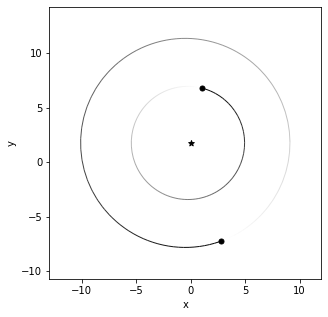

In [8]:
%matplotlib inline
fig, ax = rebound.OrbitPlot(sim)

In [9]:
record = []
for t in range(1,501):
    sim.integrate(float(t))
    orbits = sim.calculate_orbits()
    record.append([[o.a, o.e] for o in orbits])

In [10]:
semi_major_axis_planet1 = list(map(lambda x: x[0][0], record))
eccentricities_planet1 = list(map(lambda x: x[0][1], record))
semi_major_axis_planet2 = list(map(lambda x: x[1][0], record))
eccentricities_planet2 = list(map(lambda x: x[1][1], record))

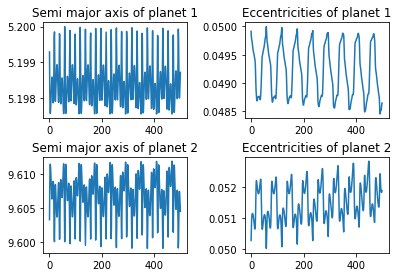

In [11]:
fig, axs = plt.subplots(2,2)
axs
axs[0][0].plot(semi_major_axis_planet1)
axs[0][1].plot(eccentricities_planet1)
axs[1][0].plot(semi_major_axis_planet2)
axs[1][1].plot(eccentricities_planet2)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
axs[0][0].title.set_text('Semi major axis of planet 1')
axs[0][1].title.set_text('Eccentricities of planet 1')
axs[1][0].title.set_text('Semi major axis of planet 2')
axs[1][1].title.set_text('Eccentricities of planet 2')
plt.show()

# 2. Making a Synthetic RV Curve and Understanding RV

## 2.1 Simulation with a single planet of 10 earth mass orbiting a 0.1 solar mass star on a circular orbit at 0.1 AU. 

In [12]:
import rebound
import matplotlib.pyplot as plt

In [61]:
# this creates a simulation object

sim = rebound.Simulation()
sim.units = ('Msun', 'AU', 'yr')

In [62]:
# add particles to the simulation

sim.add(m=0.1)            # Central object
sim.add(m=10/333000, a=0.1, e=0) # planet 

In [63]:
T = 0.1 # Use keepler third law to compute the orbital period for r = 0.1, M = 0.1
sim.integrate(30*T)

## 2.2 Plot the radial velocity of the star as a function of time

In [64]:
N = 300
times = np.linspace(0,30*T,num=N)
RVs = np.zeros(N)
for i, t in enumerate(times):
    sim.integrate(times[i])
    RVs[i] = sim.particles[0].vx # radial velocity of the host star

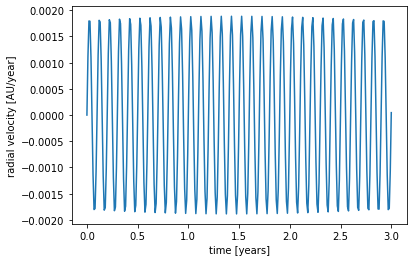

In [65]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [years]")
ax.set_ylabel("radial velocity [AU/year]")
ax.plot(times, RVs)

## 2.3 Seperately varying the mass of the star, planet and semi major axis

### 2.3.1 Varying the mass of the star

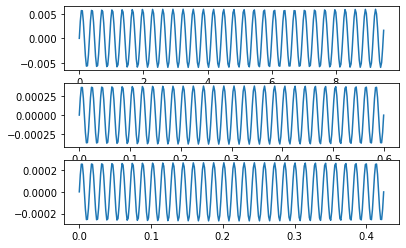

In [66]:
import math
import rebound
import matplotlib.pyplot as plt

# this creates a simulation object

num = 3
masses = np.linspace(0.01,5,num=num)
fig, axs = plt.subplots(num)


for i in range(num):
    sim = rebound.Simulation()
    sim.units = ('Msun', 'AU', 'yr')

    # add particles to the simulation

    sim.add(m=masses[i])            # Central object
    sim.add(m=10/333000, a=0.1, e=0) # planet 

    N = 300
    T = math.sqrt(0.1**3/masses[i]) # Use keepler third law to compute the orbital period for r = 0.1, M = 0.1
    times = np.linspace(0,30*T,num=N)
    RVs = np.zeros(N)
    for j, t in enumerate(times):
        sim.integrate(times[j])
        RVs[j] = sim.particles[0].vx # radial velocity of the host star
    axs[i].plot(times, RVs)
plt.show()

### Varrying the mass of the planet

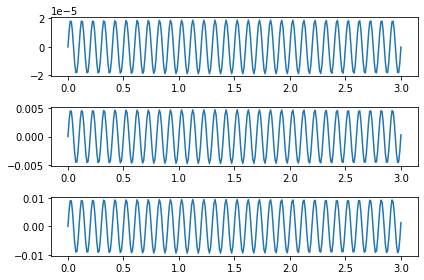

In [67]:
import rebound
import matplotlib.pyplot as plt

# this creates a simulation object

num = 3
masses = np.linspace(0.1,50,num=num)
fig, axs = plt.subplots(num)


for i in range(num):
    sim = rebound.Simulation()
    sim.units = ('Msun', 'AU', 'yr')

    # add particles to the simulation
    
    sim.add(m=0.1)            # Central object
    sim.add(m=masses[i]/333000, a=0.1, e=0) # planet 

    N = 300
    T = 0.1 # Use keepler third law to compute the orbital period for r = 0.1, M = 0.1
    times = np.linspace(0,30*T,num=N)
    RVs = np.zeros(N)
    for j, t in enumerate(times):
        sim.integrate(times[j])
        RVs[j] = sim.particles[0].vx # radial velocity of the host star
    axs[i].plot(times, RVs)
fig.tight_layout()
plt.show()

### Varrying the semi major axis of the planet

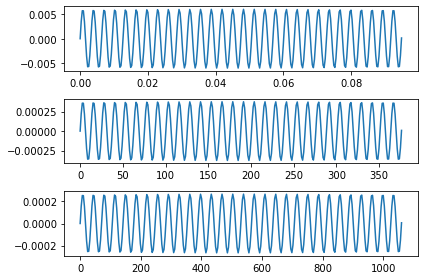

In [68]:
import rebound
import matplotlib.pyplot as plt

# this creates a simulation object

num = 3
dist = np.linspace(0.01,5,num=num)
fig, axs = plt.subplots(num)


for i in range(num):
    sim = rebound.Simulation()
    sim.units = ('Msun', 'AU', 'yr')

    # add particles to the simulation
    
    sim.add(m=0.1)            # Central object
    sim.add(m=10/333000, a=dist[i], e=0) # planet 

    N = 300
    T = math.sqrt(dist[i]**3/0.1) # Use keepler third law to compute the orbital period for r = 0.1, M = 0.1
    times = np.linspace(0,30*T,num=N)
    RVs = np.zeros(N)
    for j, t in enumerate(times):
        sim.integrate(times[j])
        RVs[j] = sim.particles[0].vx # radial velocity of the host star
    axs[i].plot(times, RVs)
fig.tight_layout()
plt.show()

## 2.4 Repeat the simultation with e=0.3

In [189]:
import rebound
import matplotlib.pyplot as plt

# this creates a simulation object

sim = rebound.Simulation()
sim.units = ('Msun', 'AU', 'yr')

In [190]:
# add particles to the simulation

sim.add(m=0.1)            # Central object
sim.add(m=10/333000, a=0.1, e=0.3) # planet 

In [191]:
N = 300
T = 0.1 
times = np.linspace(0,30*T,num=N)
RVs = np.zeros(N)
for i, t in enumerate(times):
    sim.integrate(times[i])
    RVs[i] = sim.particles[0].vx # radial velocity of the host star

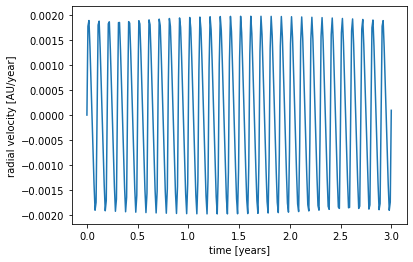

In [192]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [years]")
ax.set_ylabel("radial velocity [AU/year]")
ax.plot(times, RVs)

### 2.5 Replot the simulation but for different units (time days, radial velocity is cm/s)

In [193]:
converstion_factor = 14959787070000/(365.25*24*60*60)
days = [times[i]*365.25 for i in range(len(RVs))]
rvs = [i*converstion_factor for i in RVs]

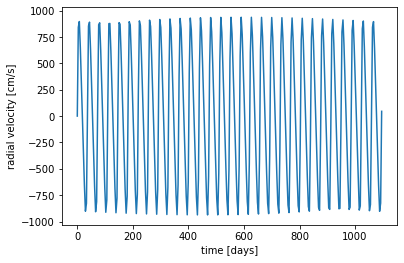

In [194]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [cm/s]")
ax.plot(days, rvs)

# Question 3

## 3.1 Reading the data

In [101]:
import numpy as np
data = np.loadtxt("data.txt")
days, RVs_data, error = data[:, 0], data[:, 1], data[:, 2]

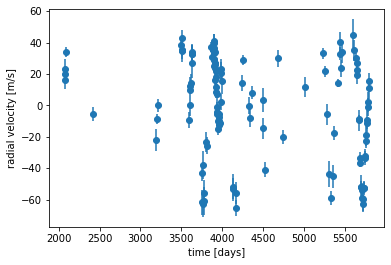

In [102]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")
ax.errorbar(days, RVs_data, yerr=error, fmt="o");

## 3.2 Testing you sythetic RV

In [103]:
import rebound
import matplotlib.pyplot as plt

# this creates a simulation object

sim = rebound.Simulation()
sim.units = ('Msun', 'AU', 'yr')

In [104]:
# add particles to the simulation

sim.add(m=0.92)            # Central object
sim.add(m=0.92*9.547919e-4, a=0.641, e=0.17) # planet 1
sim.add(m=0.85*9.547919e-4, a=1.017, e=0.10) # planet 1

In [105]:
N = 300
times = np.linspace(0,math.ceil(days[-1]/365.25),num=N)
RVs = np.zeros(N)
for i, t in enumerate(times):
    sim.integrate(times[i])
    RVs[i] = sim.particles[0].vx # radial velocity of the host star

In [106]:
times = [times[i]*365.25 for i in range(len(RVs))]
converstion_factor = 149597870700/(365.25*24*60*60)
rvs = [i*converstion_factor for i in RVs]

In [107]:
len(times)
len(rvs)

300

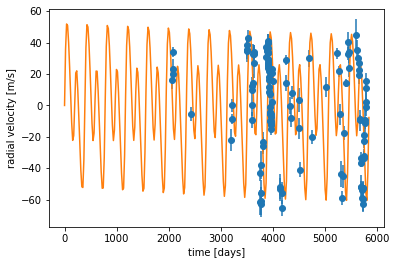

In [108]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")
ax.errorbar(days, RVs_data, yerr=error, fmt="o")
ax.plot(times, rvs)

## 3.3 Learning about emcee

### Making the synethic data 

The true model is el is shown as the thick grey line.

Text(0, 0.5, 'y')

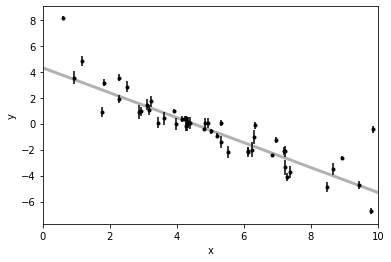

In [94]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

### The least square estimates

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

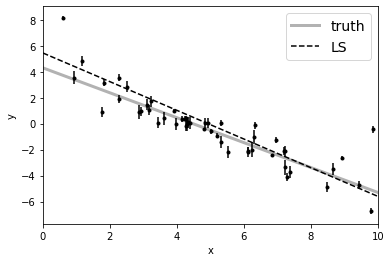

In [97]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr**2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")
plt.plot

### Maximum likelihood estimate

In [95]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


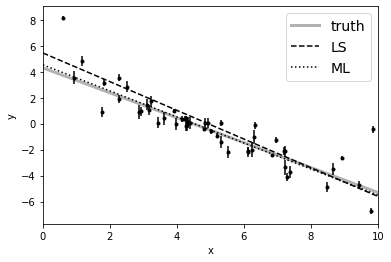

In [98]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [99]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

In [107]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [108]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True);

You must install the tqdm library to use progress indicators with emcee


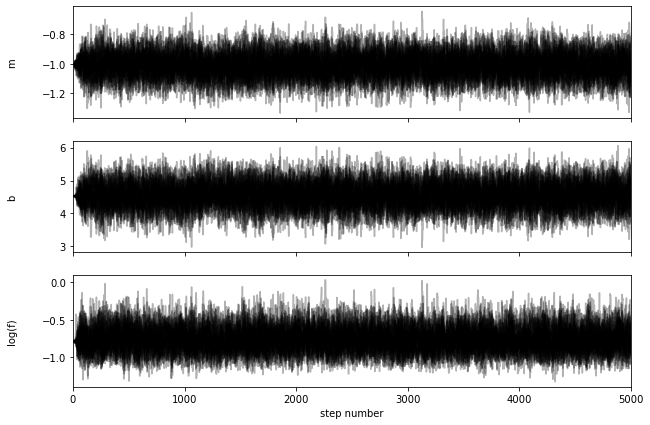

In [109]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [110]:
tau = sampler.get_autocorr_time()
print(tau) # This suggests that only about 40-42 steps are needed for the chain to “forget” where it started.

[40.66344443 41.07592317 36.59348361]


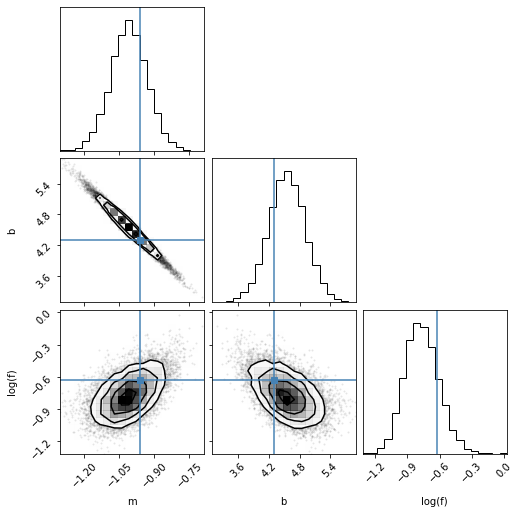

In [113]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
)

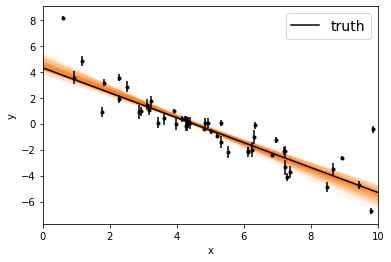

In [114]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

## 3.4 Defining the model

This is the likelihood function for our data 
$$L \sim \Sigma_i \exp\left(\frac{-((v_{\text{sim}_i}+\gamma)- v_{\text{obs}_i})^2}{\sigma^2_{\text{rv}_i}+\sigma^2_j}\right)$$
where $v_\text{sim}$ is the simulated radial velocity curve, $\gamma$ represents the motion of the entire system relative to the Earth, $v_\text{obs}$ is the observed radial velocity value from the data set, $\sigma_\text{rv}$ is the error from the RV dataset and $\sigma_j$ is a number to encode scatter in the data not captured by the observed uncertainty.


In order to fit this we introduce the parameters $v_\text{sim}$, these will be: $m_1 \sin i$ and $m_2 \sin i$ (the planet minimal masses), $a_1$ and $a_2$ (planet semi major axes), $e_1$ and $e_2$ (eccentricities), $\omega_1$, $\omega_2$ (argument of pariapsis), $M_1$ and $M_2$ (mean anomoly). The prior assoicated with these parameters is as such that a uniform prior is defined for each of the parameters over the following intervals $0.4\text{MJ} < m_1\sin(i) <
2\text{MJ} ,\\ 0.4\text{MJ} < m_2\sin(i) < 2\text{MJ} ,\\ 0.2\text{AU} < a_1 < 0.8\text{AU}, \\
0.8\text{AU} < a_2 < 1.4\text{AU}, \\ -1 < h_1, h_2, k_1, k_2 < 1, \\0 <
\omega_1, \omega_2, M_1, M_2 < 2\pi, \\ −40m/s < \gamma < 40m/s$.

## 3.5 Fitting the model

### 3.5.1 Implement the log likelihood function

In [109]:
import math
import emcee
import rebound
import numpy as np
import matplotlib.pyplot as plt

def setup_sim(params, collision=True ):
    m1, m2, a1, a2, M1, M2, h1, h2, k1, k2 = params # unpack
    sim = rebound.Simulation()
    sim.units = ["msun", "m", "s"]
    sim.add(m=1)
    e1 = math.sqrt(h1**2 + k1**2) 
    e2 = math.sqrt(h2**2 + k2**2) 
    rhill1 = a1*((m1/m2)/3)**(0.333)
    rhill2 = a2*((m1/m2)/3)**(0.333)
    sim.add(m=m1*9.547919e-4, e=e1, a=a1*149597870691, M=math.radians(M1), r=rhill1*149597870691)
    sim.add(m=m2*9.547919e-4, e=e2, a=a2*149597870691, M=math.radians(M2), r=rhill2*149597870691)
    if collision:
      sim. collision = "direct"
      sim.collision_resolve = "halt"
    sim.move_to_com()
    return sim
  

def log_likelihood(theta, times, RVs, RVs_sigma):
    ll = 0. # We use the log likelihood to avoid numerical issues with very small/large numbers
    sim = setup_sim(theta[:-2])
    gamma, sigma_j = theta[-2], theta[-1]
    for i, t in enumerate(times):
        try:
          sim.integrate(t)
          print(sim.particles[0].vx)
          deltaRV = sim.particles[0].vx + gamma - RVs[i]
          ll += -(deltaRV)**2/(sigma_j**2 + RVs_sigma[i]**2)
        except rebound.Collision as error:
          return -float("inf")
    return ll

### 3.5.2 implement log prior

In [110]:
def log_prior(theta):
    m1, m2, a1, a2, M1, M2, h1, h2, k1, k2, gamma, sigma_j = theta # unpack
    if 0.4 < m1 < 2 and 0.4 < m2 < 2 and 0.2<a1<0.8 and 0.8<a2<1.4 and -1<h1 < 1 and -1<h2 < 1 and -1<k1 < 1 and -1<k2 < 1 and 0 < math.radians(M1) < 2*math.pi and 0 < math.radians(M2)  < 2*math.pi and -40<gamma<40 :
        return 0
    return -float("inf")

### 3.5.3 log prob function

In [111]:
def log_prob(theta, times, RVs, RVs_sigma):
    return log_likelihood(theta, times, RVs, RVs_sigma) + log_prior(theta)

### 3.5.4 Create 40 walkers

In [152]:
nwalkers = 40
# m1, m2, a1, a2, M1, M2, h1, h2, k1, k2, gamma, sigma_j
e1 , e2 = 0.17, 0.10
omega1, omega2 = 178, 241
h1, h2 = e1*math.sin(omega1), e2*math.sin(omega2)
k1, k2 = e1*math.cos(omega1), e2*math.cos(omega2)
theta = [0.92, 0.85, 0.641, 1.017, 91, 178, h1, h2, k1, k2, 3.76, 2.90] 
theta = np.tile(theta,(nwalkers,1)) # copy initial conditions for each walker
theta += 0.05*np.random.random(theta.shape)*theta # slightly perturb initial conditions by 0.05

In [153]:
print(np.mean(theta, axis=0))

[ 9.44376963e-01  8.71310677e-01  6.57136470e-01  1.03820572e+00
  9.32738897e+01  1.82701867e+02  1.52688834e-01  8.02525581e-02
 -8.37105918e-02 -6.36396275e-02  3.84529072e+00  2.96996934e+00]


### 3.5.5 Run the walkers

In [154]:
N = 300
ndim = 12
num_steps = 6000
burn_in = 1000
filename = "data.txt"
data = np.loadtxt(filename)
times, RVs, RVs_sigma = data[:, 0], data[:, 1], data[:, 2]
times = [days*24*60*60 for days in times]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[times, RVs, RVs_sigma])
state = sampler.run_mcmc(theta, num_steps)

/Users/mingliangang/opt/anaconda3/envs/cta200/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


In [181]:
est_params = np.mean(sampler.get_chain(discard=burn_in+4000, flat=True), axis=0)

In [208]:
print(est_params)

[ 9.44376963e-01  8.71310677e-01  6.57136470e-01  1.03820572e+00
  9.32738897e+01  1.82701867e+02  1.52688834e-01  8.02525581e-02
 -8.37105918e-02 -6.36396275e-02  3.84529072e+00  2.96996934e+00]


### 3.5.6  Estimating the errorbars

In [183]:
flat_samples = sampler.get_chain(discard=burn_in, flat=True)
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [0.25, 50, 97.25])
    q = np.diff(mcmc)
    print(q)

[0.0229278  0.02036408]
[0.0167332  0.02059658]
[0.0139214  0.01673487]
[0.01845963 0.02848187]
[2.13661113 1.97611761]
[4.92892888 3.1224923 ]
[0.00325026 0.00337973]
[0.00165318 0.00202108]
[0.00186971 0.00197655]
[0.00120235 0.00148607]
[0.08119053 0.09677317]
[0.07254936 0.06541618]


### 3.5.7 Plot a synthetic RV curve

In [184]:
sim = setup_sim(est_params[:-2], collision=False)
N = 30000
times, RVs, RVs_sigma = data[:, 0], data[:, 1], data[:, 2]
times = np.linspace(0,math.ceil(times[-1])*24*60*60,num=N)
RVs = np.zeros(N)
for i, t in enumerate(times):
    sim.integrate(times[i])
    RVs[i] = sim.particles[0].vx # radial velocity of the host star

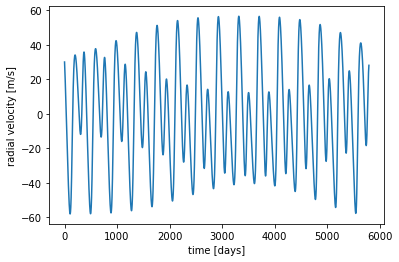

In [185]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")
ax.plot([i/(24*60*60) for i in times], RVs)

### 3.5.8 Choose 50 random samples from the MCMC chain

In [209]:
print(est_params)

[ 9.44376963e-01  8.71310677e-01  6.57136470e-01  1.03820572e+00
  9.32738897e+01  1.82701867e+02  1.52688834e-01  8.02525581e-02
 -8.37105918e-02 -6.36396275e-02  3.84529072e+00  2.96996934e+00]


0


KeyboardInterrupt: 

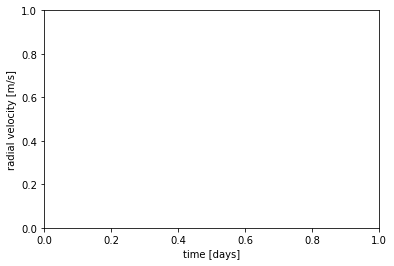

In [207]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")

data = np.loadtxt("data.txt")
days, RVs_data, error = data[:, 0], data[:, 1], data[:, 2]
times = np.linspace(0,math.ceil(days[-1]*24*60*60),num=N)

Nplot = 50
indx = np.random.randint(5500, num_steps, size=Nplot)
for i in range(Nplot):
    est = sampler.flatchain[burn_in+indx[i]]
    s = setup_sim(est[:-2], collision=False) # skipping burn-in
    RVs_plot = np.zeros(N)
    print(i)
    for j, t in enumerate(times):
        s.integrate(t*24*60*60)
        RVs_plot[j] = s.particles[0].vx
    ax.plot(days, RVs_plot, color="black", alpha=0.13)
    
ax.errorbar(days, RVs, yerr=20, fmt="o");   

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("time [days]")
ax.set_ylabel("radial velocity [m/s]")

times_plot = np.linspace(0,times[-1],1000)
RVs_plot = np.zeros(len(times_plot))
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)

### 3.5.9 Create Corner plot

In [ ]:
import corner

e1 , e2 = 0.17, 0.10
omega1, omega2 = 178, 241
h1, h2 = e1*math.sin(omega1), e2*math.sin(omega2)
k1, k2 = e1*math.cos(omega1), e2*math.cos(omega2)
theta = [0.92, 0.85, 0.641, 1.017, 91, 178, h1, h2, k1, k2, 3.76, 2.90] 

corner.corner(sampler.flatchain[burn_in:], 
              labels = ["m1", "m2", "a1", "a2", "M1", "M2", "h1", "h2", "k1", "k2", "gamma", "sigma_j"], 
              truths = theta)